# used library

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn .metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#Importing dataset

In [4]:
df = pd.read_csv("/content/tested.csv")

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape

(418, 12)

In [7]:
#checking null value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

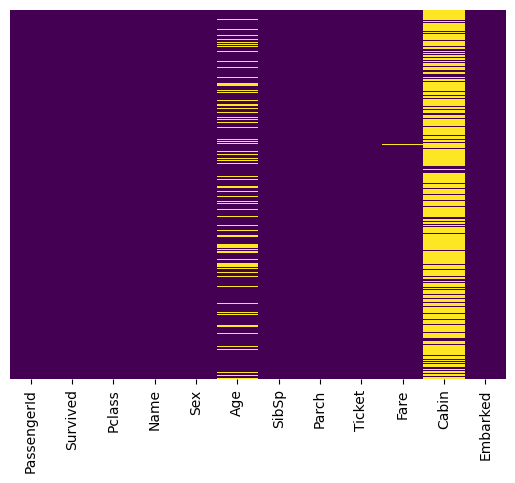

In [9]:
sns.heatmap(df.isnull() , yticklabels=False , cbar =False , cmap ='viridis')

In [10]:
#checking the class of survived columns
df['Survived'].unique()

array([0, 1])

In [11]:
#checking category data
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

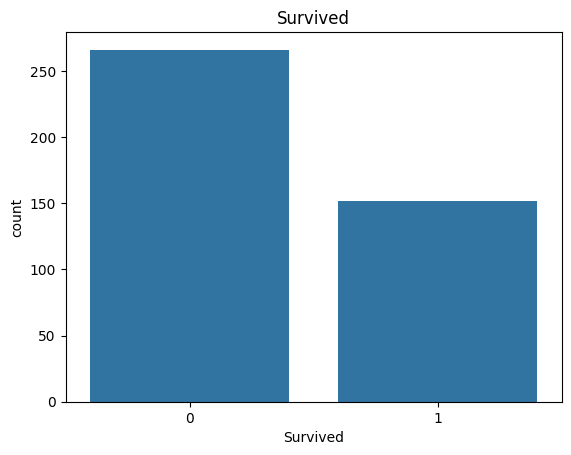

In [14]:
sns.countplot(x=df['Survived'])
plt.title('Survived');

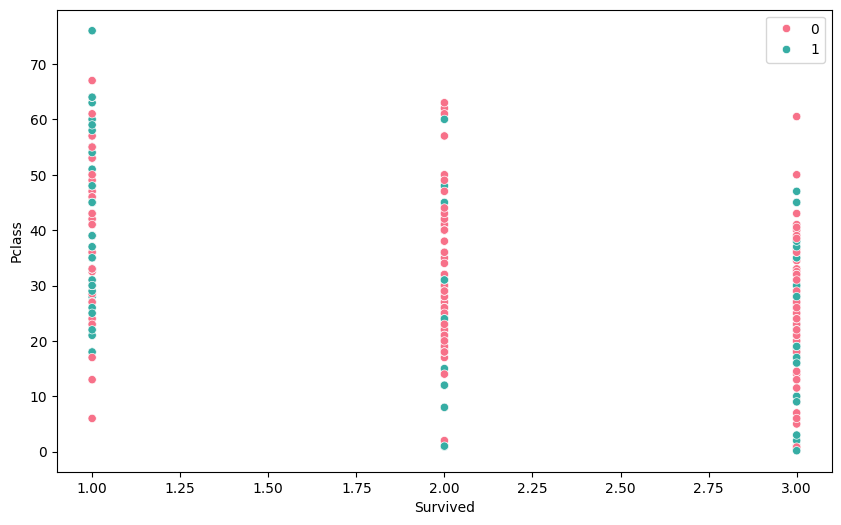

In [15]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y=df["Age"] , x=df["Pclass"] ,hue=df["Survived"] ,palette="husl")
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.legend()

<Axes: title={'center': 'passenger on the titanic '}>

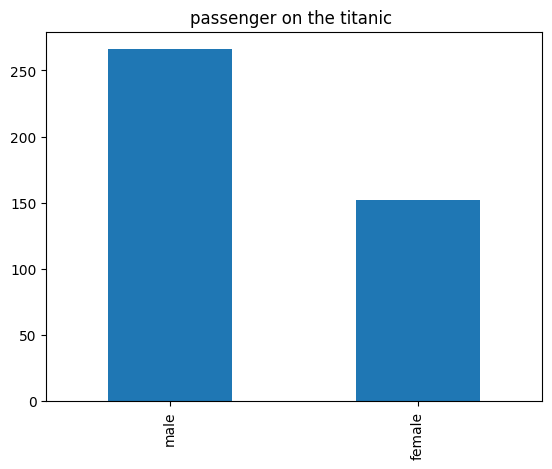

In [16]:
df['Sex']. value_counts().plot.bar(title="passenger on the titanic ")

<Axes: >

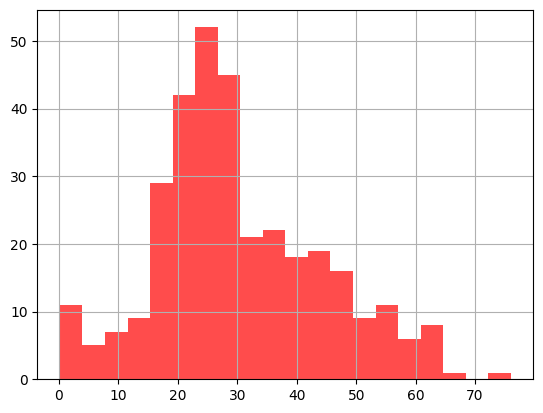

In [18]:
df['Age'].hist(bins=20,color='red',alpha=0.7)


# prediction is based on pclass , sex , age and fare

In [20]:
df.drop('Cabin' , axis =1 , inplace =True)

df

KeyError: "['Cabin'] not found in axis"

In [21]:
df = df.dropna(subset =['Fare' , 'Age'] )


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [23]:
df.shape

(331, 11)

In [24]:
X = df[["Pclass" , "Sex" , "Age" , "Fare"]]
y = df["Survived"]

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X["Sex"] = encoder.fit_transform(X["Sex"])
X

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875
...,...,...,...,...
409,3,0,3.0,13.7750
411,1,0,37.0,90.0000
412,3,0,28.0,7.7750
414,1,0,39.0,108.9000


# Train test Split

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

# Modelling using Machine Learning Algorithm

In [32]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(max_iter=1500)
LR_model.fit(X_train,y_train)

LogisticRegression(max_iter=1500)

In [33]:
LR_model.score(X_train , y_train)

1.0

In [34]:
LR_pred = LR_model.predict(X_test)

In [35]:
LR_accuracy = accuracy_score(y_test , LR_pred)

In [36]:
print(classification_report(y_test , LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Text(95.72222222222221, 0.5, 'Truh')

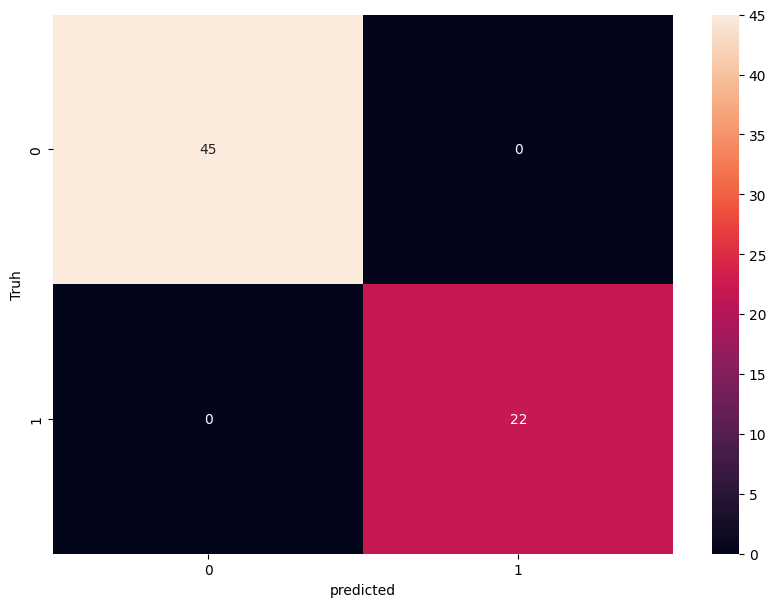

In [37]:
# confusion matrix
cm1 = confusion_matrix(y_test,LR_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')